In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
loans_income = pd.read_csv('../data/loans_income.csv')
# loans_income.head()
print(loans_income.info())
print(loans_income.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
None
                  x
count   50000.00000
mean    68760.51844
std     32872.03537
min      4000.00000
25%     45000.00000
50%     62000.00000
75%     85000.00000
max    199000.00000


In [19]:
loans_income = loans_income.squeeze('columns')

In [20]:
loans_income.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: x
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


In [24]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data'
})
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mena of 5'
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': "Mean of 20"
})

In [25]:
print(sample_mean_05.info())
print(sample_mean_05.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  1000 non-null   float64
 1   type    1000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 15.8+ KB
None
              income
count    1000.000000
mean    68831.320000
std     14369.285181
min     35879.400000
25%     58966.000000
50%     68000.000000
75%     77892.000000
max    124600.000000


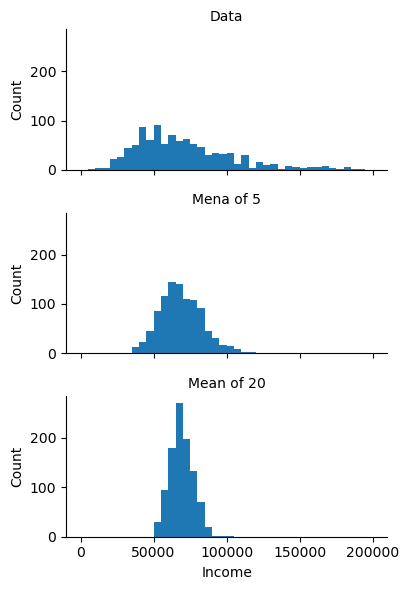

In [27]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', "Count")
g.set_titles('{col_name}')

In [ ]:
from sklearn.utils import resample

In [32]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print("Bootstrap Statistics:")
print(f"original: {loans_income.median()}")
print(f"bias: {results.mean() - loans_income.median()}")
print(f"std. error: {results.std()}")

Bootstrap Statistics:
original: 62000.0
bias: -78.90750000000116
std. error: 225.30279190855978


In [33]:
from scipy import stats

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

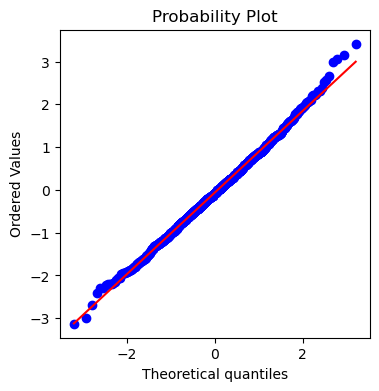

In [34]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=1000)
stats.probplot(norm_sample, plot=ax)

In [36]:
sp500_px = pd.read_csv('../data/sp500_data.csv.gz', index_col=0, parse_dates=True)

In [43]:
nflx = sp500_px.NFLX

In [45]:
nflx

array([ 0.1941524 , -0.28767869, -0.12516315, ..., -0.33897658,
       -0.29747412, -0.38983429])

((array([-3.11014301, -2.83805579, -2.68575323, -2.5781051 , -2.49397612,
         -2.42449177, -2.36505164, -2.3129519 , -2.26646365, -2.22441201,
         -2.18596094, -2.15049362, -2.11754151, -2.08674001, -2.05779966,
         -2.03048666, -2.00460939, -1.98000872, -1.95655105, -1.93412304,
         -1.91262772, -1.89198143, -1.87211149, -1.85295431, -1.83445397,
         -1.81656099, -1.79923138, -1.78242585, -1.76610914, -1.75024952,
         -1.7348183 , -1.71978946, -1.70513931, -1.69084624, -1.67689049,
         -1.66325388, -1.64991974, -1.63687267, -1.62409842, -1.61158383,
         -1.59931667, -1.58728556, -1.57547992, -1.56388985, -1.55250614,
         -1.54132014, -1.53032373, -1.51950932, -1.50886976, -1.49839831,
         -1.48808863, -1.47793473, -1.46793097, -1.45807199, -1.44835273,
         -1.43876839, -1.42931442, -1.41998651, -1.41078054, -1.4016926 ,
         -1.39271898, -1.38385612, -1.37510066, -1.36644935, -1.35789913,
         -1.34944704, -1.34109027, -1.

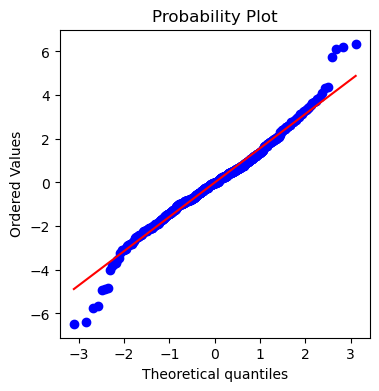

In [48]:
nflx = np.diff(np.log(nflx[nflx > 0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

In [53]:
stats.binom.pmf(1, n=5, p=0.1)

np.float64(0.32804999999999995)

In [54]:
stats.poisson.rvs(2, size=100)

array([2, 0, 4, 2, 2, 2, 1, 2, 0, 3, 4, 4, 5, 2, 1, 1, 3, 3, 0, 1, 1, 5,
       3, 3, 2, 0, 1, 3, 4, 1, 4, 3, 3, 3, 5, 4, 2, 1, 3, 3, 1, 3, 2, 1,
       2, 2, 2, 3, 1, 1, 0, 0, 0, 1, 2, 4, 2, 5, 8, 2, 5, 1, 2, 1, 0, 1,
       4, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 4, 1, 2, 4, 5, 2, 2, 1, 1,
       1, 2, 0, 3, 2, 2, 2, 2, 1, 4, 3, 1])

In [55]:
stats.expon.rvs(0.2, size=100)

array([1.58317184, 2.65820444, 1.15909438, 0.71553308, 0.25286973,
       3.03604708, 1.07773323, 0.79623288, 0.80386222, 3.25119968,
       1.01001807, 2.47128045, 0.41094738, 3.75271471, 0.36004783,
       3.03218913, 0.80730445, 1.14704342, 0.80302988, 0.28380512,
       0.90124894, 2.50256726, 4.1494333 , 1.11582992, 0.44584597,
       1.976743  , 0.30565634, 0.95253731, 0.50742736, 0.51888123,
       0.4218849 , 0.66433821, 0.20160265, 0.28463685, 2.46160903,
       0.70564693, 0.26253476, 0.99937687, 1.55556186, 0.45977032,
       0.74792617, 2.96788128, 0.36656407, 0.77164136, 1.62121036,
       3.71289716, 0.75885819, 1.94144844, 0.43115308, 0.57038162,
       0.59520207, 0.23571683, 0.53449261, 0.59619432, 0.75593968,
       1.62543827, 0.89332861, 0.22978011, 2.71519046, 0.23081432,
       1.60187743, 0.31317786, 0.89923255, 0.38282971, 1.87668844,
       0.74371209, 0.87862764, 0.5691922 , 1.22301308, 1.61436465,
       0.68407848, 0.3249066 , 0.62734272, 0.63448899, 0.62549